In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
conv = pd.read_csv('conversion_data.csv')

In [5]:
conv.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
## max age is 123
conv.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
## Confirmed there's no missing data
conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [8]:
conv.isnull()

,country,age,new_user,source,total_pages_visited,converted
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
316195,False,False,False,False,False,False
316196,False,False,False,False,False,False
316197,False,False,False,False,False,False
316198,False,False,False,False,False,False


# EDA

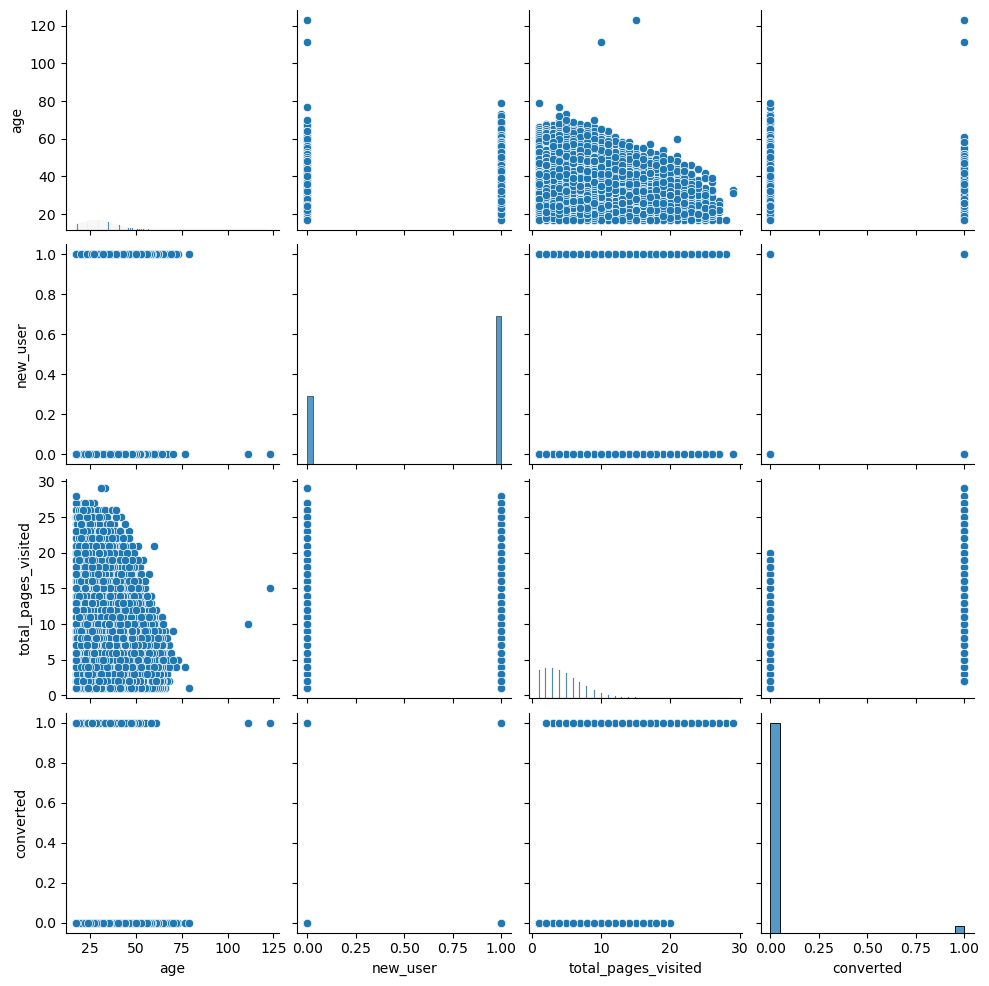

In [9]:
sns.pairplot(conv)

<Axes: xlabel='converted', ylabel='count'>

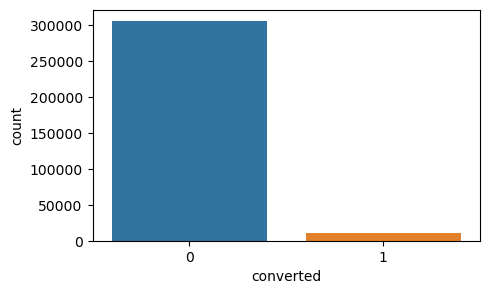

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x='converted',data=conv)

The data is highly imbalanced, with only 3% of users converted. This tells us that accuracy is not a great evaluation metric for the model. If we predict that the user will not convert for 100% of users, we will have a 97% accuracy.

<Axes: xlabel='converted', ylabel='count'>

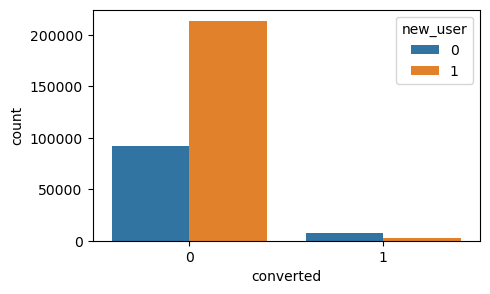

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x='converted',data=conv,hue='new_user')

<Axes: xlabel='converted', ylabel='count'>

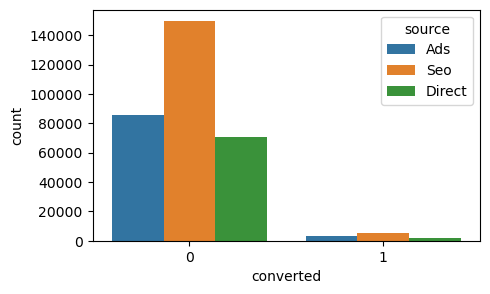

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x='converted',data=conv,hue='source')

<Axes: xlabel='converted', ylabel='count'>

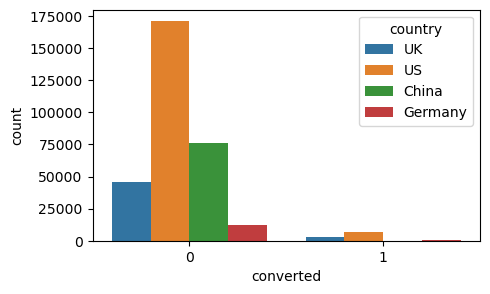

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x='converted',data=conv,hue='country')

/var/folders/_g/5wq80nr13wv9wfwcz5y8sscw0000gp/T/ipykernel_37235/52814336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(conv['age'])


<Axes: xlabel='age', ylabel='Density'>

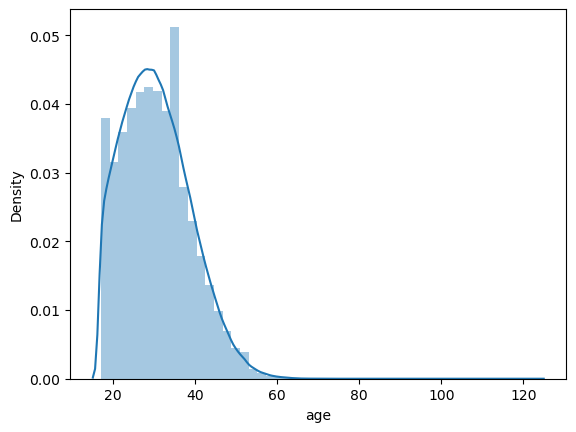

In [14]:
sns.distplot(conv['age'])

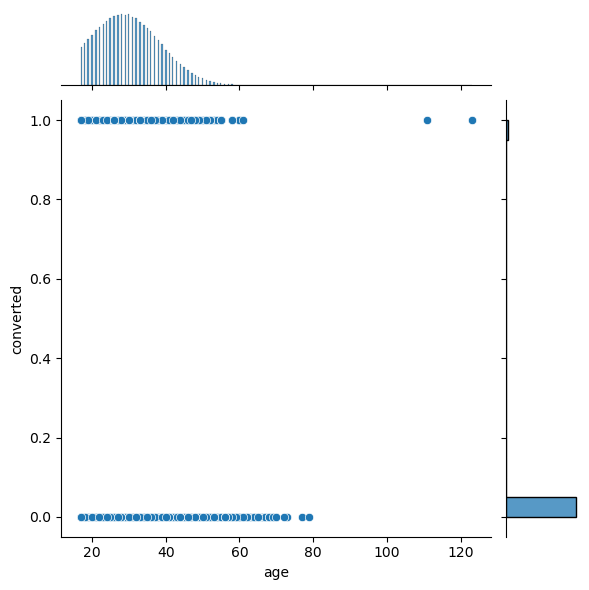

In [15]:
sns.jointplot(x='age',y='converted',data=conv)

/var/folders/_g/5wq80nr13wv9wfwcz5y8sscw0000gp/T/ipykernel_37235/1409183285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(conv['total_pages_visited'],kde=False,bins=15)


<Axes: xlabel='total_pages_visited'>

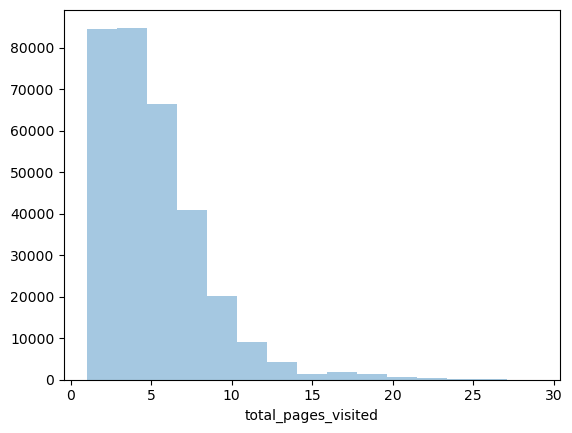

In [16]:
sns.distplot(conv['total_pages_visited'],kde=False,bins=15)

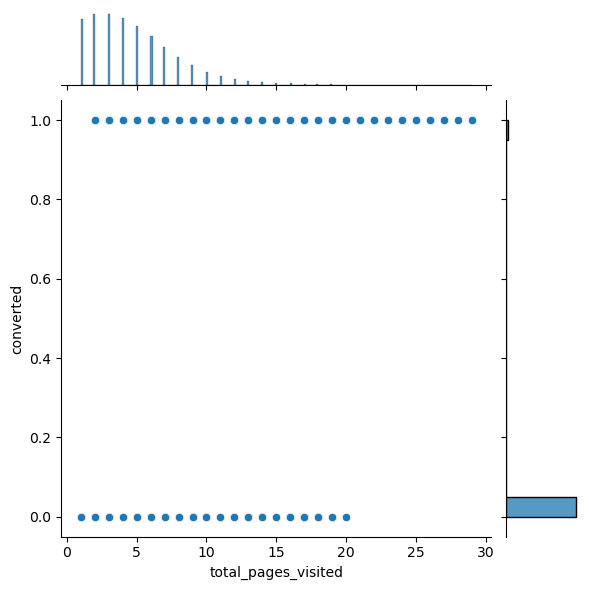

In [17]:
sns.jointplot(x='total_pages_visited',y='converted',data=conv)

In [18]:
conv['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [19]:
# users from china has the lowest conversion rate
conv.groupby(['country']).mean()['converted']

/var/folders/_g/5wq80nr13wv9wfwcz5y8sscw0000gp/T/ipykernel_37235/3339853807.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conv.groupby(['country']).mean()['converted']


country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: converted, dtype: float64

In [20]:
conv['converted'].mean()

0.03225806451612903

In [21]:
conv.groupby(['source']).mean()['converted']

/var/folders/_g/5wq80nr13wv9wfwcz5y8sscw0000gp/T/ipykernel_37235/1389487481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conv.groupby(['source']).mean()['converted']


source
Ads       0.034483
Direct    0.028169
Seo       0.032895
Name: converted, dtype: float64

In [22]:
conv[conv['new_user']==0].groupby(['source'])['converted'].mean()

source
Ads       0.078341
Direct    0.061161
Seo       0.073414
Name: converted, dtype: float64

From the above plots, we can see the below trends:
1. China has the second most users, but the conversion rate from users in China are significantly lower than other countries.
2. Younger users are more likely to convert. There are no conversions from users over 60 years old.
3. Users who viewed more pages are more likely to convert.
4. Users coming from ads and SEO are more likely to convert from direct traffic. This is likely due to intent.

# Data Cleaning

In [23]:
conv[conv['age']>80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [24]:
conv.groupby('country')['age'].mean()

country
China      30.672972
Germany    30.449985
UK         30.451538
US         30.566482
Name: age, dtype: float64

In [25]:
conv['age'].mean()

30.569857685009488

In [26]:
def impute_age(col):
    if col > 80:
        return 30.57
    else:
        return col

In [27]:
conv['age'] = conv['age'].apply(impute_age)

In [28]:
conv.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25.0,1,Ads,1,0
1,US,23.0,1,Seo,5,0
2,US,28.0,1,Seo,4,0
3,China,39.0,1,Seo,5,0
4,US,30.0,1,Seo,6,0


In [29]:
conv[conv.index.isin([90928,295581])]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,30.57,0,Seo,15,1
295581,UK,30.57,0,Ads,10,1


# Convert Categorical Columns

In [30]:
conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              316200 non-null  object 
 1   age                  316200 non-null  float64
 2   new_user             316200 non-null  int64  
 3   source               316200 non-null  object 
 4   total_pages_visited  316200 non-null  int64  
 5   converted            316200 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.5+ MB


In [31]:
## alternatively: pd.get_dummies(conv[['country','source']])
country=pd.get_dummies(conv['country'])
source=pd.get_dummies(conv['source'])

In [32]:
conv2=pd.concat([conv,country,source],axis = 1)
conv2.head()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,UK,25.0,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23.0,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28.0,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39.0,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30.0,1,Seo,6,0,0,0,0,1,0,0,1


In [33]:
conv2.drop(['country', 'source'],axis=1, inplace=True)
conv2.head()

,age,new_user,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,25.0,1,1,0,0,0,1,0,1,0,0
1,23.0,1,5,0,0,0,0,1,0,0,1
2,28.0,1,4,0,0,0,0,1,0,0,1
3,39.0,1,5,0,1,0,0,0,0,0,1
4,30.0,1,6,0,0,0,0,1,0,0,1


In [34]:
conv2.corr()

,age,new_user,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
age,1.000000,0.012444,-0.046093,-0.089190,0.007088,-0.003172,-0.006144,-0.000388,-0.002680,-0.000088,0.002482
new_user,0.012444,1.000000,-0.082541,-0.152374,0.015897,-0.003678,-0.005158,-0.008511,0.000316,0.001631,-0.001655
total_pages_visited,-0.046093,-0.082541,1.000000,0.528994,-0.054061,0.019737,0.026635,0.019439,0.004967,-0.009146,0.003223
converted,-0.089190,-0.152374,0.528994,1.000000,-0.098972,0.035521,0.049051,0.035623,0.007865,-0.012614,0.003534
China,0.007088,0.015897,-0.054061,-0.098972,1.000000,-0.117344,-0.240525,-0.642083,0.001035,-0.001429,0.000270
Germany,-0.003172,-0.003678,0.019737,0.035521,-0.117344,1.000000,-0.088280,-0.235664,0.003393,-0.004775,0.000965
UK,-0.006144,-0.005158,0.026635,0.049051,-0.240525,-0.088280,1.000000,-0.483053,-0.001549,0.000718,0.000788
US,-0.000388,-0.008511,0.019439,0.035623,-0.642083,-0.235664,-0.483053,1.000000,-0.001130,0.002628,-0.001193
Ads,-0.002680,0.000316,0.004967,0.007865,0.001035,0.003393,-0.001549,-0.001130,1.000000,-0.340438,-0.612633
Direct,-0.000088,0.001631,-0.009146,-0.012614,-0.001429,-0.004775,0.000718,0.002628,-0.340438,1.000000,-0.534593


<Axes: >

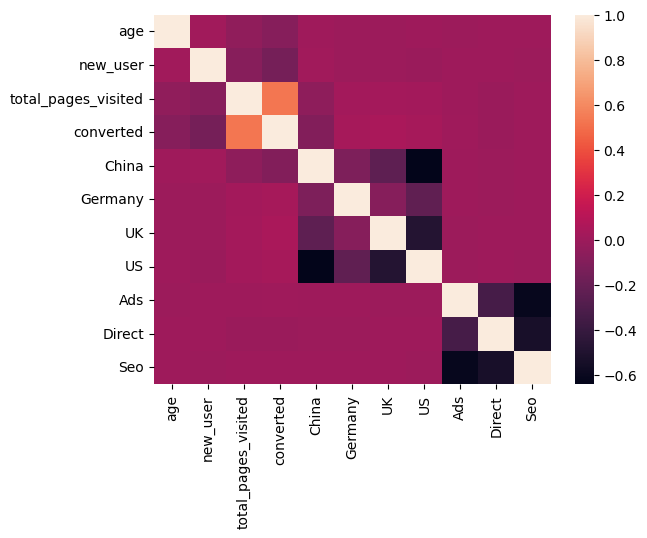

In [35]:
sns.heatmap(conv2.corr())

# Build Logistic Model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
conv2.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'China',
       'Germany', 'UK', 'US', 'Ads', 'Direct', 'Seo'],
      dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(conv2[['age', 'new_user', 'total_pages_visited', 'Germany', 'UK',
       'US', 'China','Direct', 'Seo','Ads']], conv2[['converted']], test_size=0.33, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel=LogisticRegression()

In [43]:
logmodel.fit(X_train,y_train)

/Users/sashac/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sashac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Method 1: use logmodel.predict(). This would by default using 0.5 as a threshold.

In [44]:
y_predict=logmodel.predict(X_test)

Method 2: use logmodel.predict_proba().
It will output the probabilities of 0s and 1s for each record; 
If use predict_proba, we could use the empirital conversion rate as a threshold to determine whether the user will convert.

In [45]:
y_predict_proba=logmodel.predict_proba(X_test)
y_predict_proba
# for each row, return the probability of 0 and 1

array([[9.99761209e-01, 2.38790779e-04],
       [9.99999332e-01, 6.67531254e-07],
       [9.98604599e-01, 1.39540050e-03],
       ...,
       [9.99137959e-01, 8.62040980e-04],
       [9.96718250e-01, 3.28174961e-03],
       [9.99822193e-01, 1.77807118e-04]])

In [50]:
df_y_predict=pd.DataFrame(y_predict_proba)
df_y_predict['y_predict2']=np.where(df_y_predict[1]>=0.032258,1,0)
df_y_predict.head()

,0,1,y_predict2
0,0.999761,2.387908e-04,0
1,0.999999,6.675313e-07,0
2,0.998605,1.395401e-03,0
3,0.999286,7.140178e-04,0
4,0.988262,1.173847e-02,0


# Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    101065
           1       0.84      0.69      0.76      3281

    accuracy                           0.99    104346
   macro avg       0.92      0.84      0.88    104346
weighted avg       0.99      0.99      0.99    104346



In [35]:
## TN, FP
## FN, TP
confusion_matrix(y_test,y_predict)

array([[100639,    426],
       [  1009,   2272]])

Accuracy is not a good metric for measurement. However, the model did improve accuracy to be come 99%, which is an improvement from 97%. This indicate the logistic regression model makes sense.

Recall = 69%. This means we classify 69% of converted users as converted, and 31% as not converted.

Precison = 84%. This means 84% of users that we think will convert actually converted.

# Model Interpretation

In [19]:
logmodel.coef_

array([[-0.07768553, -1.76023193,  0.7626259 , -0.03993185, -0.22076961,
        -0.6215226 , -3.74716652, -1.66672736, -1.48856858, -1.47409464]])

In [20]:
pd.DataFrame(data=logmodel.coef_[0],index=['age', 'new_user', 'total_pages_visited', 'Germany', 'UK',
       'US', 'China','Direct', 'Seo','Ads'], columns=['coefficient'])

,coefficient
age,-0.077686
new_user,-1.760232
total_pages_visited,0.762626
Germany,-0.039932
UK,-0.220770
US,-0.621523
China,-3.747167
Direct,-1.666727
Seo,-1.488569
Ads,-1.474095


Base on this analysis, we can learn that:
1. China has the second most users but it's conversion rate is significantly lower than users from other countries. This tells us there might be something wrong with their user experience, such as bad translation, doesn't fit into local culture, etc. We should do more research to understand what are the issues with the Chinese version of the site.
2. The site is performing really well in Germany, with the highest conversion rate of all the countries. We should try to 1) promote the website more in Germany and attract more users, and 2) do more research to understand what are the strengths of the German version of the site, and see if we can adopt those learnings for other countries.
3. Total number of page visited is strongly correlated with whether a user convert or not. However, this learning is not very actionable, because if a user converts on the site, they will have to go to the steps of landing on different pages of item descriptions, land on cart page, land on check out page, land on order confirmation page. Solely optimizing towards higher number of page visited would be a mistake, which will result in poor user experience.
4. The site is performing well for young users, and not as well for old users. We should try to understand what are the frictions that older users are experience on the site, such as whether the size of the text is too small, or if the language on the size is more tailored towards younger users. Additionally, since the site is performing well for young users, we should target our advertising efforts towards younger people.
5. The site is performing better for return users than new users. This is intuitive since a users who visit the site again might have more intent to convert. This tells us that we need to spend more efforts on retargeting since people are more likely to convert when they come back to the site again.
6. Users coming from direct traffic performs worse than those coming from SEO or Ads. We should do further analysis on what is usually the landing page of direct traffic, and for example, if it is the homepage, then we should optimize this page and tailor it towards users' needs more. 
